In [1]:
#Importação de bibliotacas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importando ps CSV com pandas
pilotos = pd.read_csv('./bases/drivers.csv')
piloto_classificacoes = pd.read_csv('./bases/driver_standings.csv')
corridas = pd.read_csv('./bases/races.csv')
sprint_resultados = pd.read_csv('./bases/sprint_results.csv')
circuitos = pd.read_csv('./bases/circuits.csv')
tempo_por_volta = pd.read_csv('./bases/lap_times.csv')
parada_boxes = pd.read_csv('./bases/pit_stops.csv')
qualificacao = pd.read_csv('./bases/qualifying.csv')
resultados = pd.read_csv('./bases/results.csv')
status = pd.read_csv('./bases/status.csv')
temporadas = pd.read_csv('./bases/seasons.csv')
construtores = pd.read_csv('./bases/constructors.csv')
construtor_classificacoes = pd.read_csv('./bases/constructor_standings.csv')
construtor_resultados = pd.read_csv('./bases/constructor_results.csv')


## Tratamento de dados/Limpeza
#Tabelas a serem tratadas: races, tb_circuts, laptimes, constructor satadings/results

### T/L tabela RACES (CORRIDAS)

Comentários: Deletado coluna URL e substituido valores ("\N") para NULL com (np.nan)

#### Alterações pré-determinadas:

In [3]:
#Colocando as colunas em PT_BR
corridas.columns = ['corrida_id', 'ano', 'rodada', 'circuito_id', 'nome', 'data','hora','url','fp1_data','fp1_hora','fp2_data','fp2_hora','fp3_data','fp3_hora','quali_data','quali_hora','sprint_data','sprint_hora']

In [4]:
#Deletando colunas que não precisam

#DROP COLUNA URL
corridas = corridas.drop('url', axis=1)

#### Alterações de type nas colunas e nulls

In [5]:
#Colocando os valores "\n" COMO None
corridas = corridas.replace('\\N', np.nan)

In [6]:
#Transformando em date, pois está em object
corridas['data'] = pd.to_datetime(corridas['data'])
corridas['fp1_data'] = pd.to_datetime(corridas['fp1_data'])
corridas['fp2_data'] = pd.to_datetime(corridas['fp2_data'])
corridas['fp3_data'] = pd.to_datetime(corridas['fp3_data'])
corridas['quali_data'] = pd.to_datetime(corridas['quali_data'])
corridas['sprint_data'] = pd.to_datetime(corridas['sprint_data'])

In [7]:
#Transformando em String
corridas['nome'] = corridas['nome'].astype(pd.StringDtype())

In [8]:
#Transformando em DateTime
corridas['hora'] = pd.to_datetime(corridas['hora'], format='%H:%M:%S')
corridas['fp1_hora'] = pd.to_datetime(corridas['fp1_hora'], format='%H:%M:%S')
corridas['fp2_hora'] = pd.to_datetime(corridas['fp2_hora'], format='%H:%M:%S')
corridas['fp3_hora'] = pd.to_datetime(corridas['fp3_hora'], format='%H:%M:%S')
corridas['quali_hora'] = pd.to_datetime(corridas['quali_hora'], format='%H:%M:%S')
corridas['sprint_hora'] = pd.to_datetime(corridas['sprint_hora'], format='%H:%M:%S')

In [9]:
#retorna o número de valores ausentes para cada coluna.
corridas.isna().sum()

corrida_id        0
ano               0
rodada            0
circuito_id       0
nome              0
data              0
hora            731
fp1_data       1035
fp1_hora       1057
fp2_data       1035
fp2_hora       1057
fp3_data       1047
fp3_hora       1066
quali_data     1035
quali_hora     1057
sprint_data    1089
sprint_hora    1092
dtype: int64

In [10]:
#Calcula o percentual de valores ausentes
def perc_na(df: pd.DataFrame) -> float:
    return np.count_nonzero(df.isnull().values) / (df.shape[0] * df.shape[1]) * 100.0


pd.DataFrame([
    ["Corridas:", perc_na(corridas)]
], columns=["Dataframe", "% de valores ausentes"])

,Dataframe,% de valores ausentes
0,Corridas:,60.378266


#### Informações Finais

In [11]:
#Informações
corridas.columns
corridas.shape
corridas.dtypes

print("Descricao: ")
corridas.describe()
print("\n")

# Obtendo informações sobre as colunas
print("Informacoes: ")
corridas.info()
print("\n")


print("Dimensoes: ")
print(corridas.shape)
print("\n")

corridas.head(5)

Descricao: 


Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   corrida_id   1101 non-null   int64         
 1   ano          1101 non-null   int64         
 2   rodada       1101 non-null   int64         
 3   circuito_id  1101 non-null   int64         
 4   nome         1101 non-null   string        
 5   data         1101 non-null   datetime64[ns]
 6   hora         370 non-null    datetime64[ns]
 7   fp1_data     66 non-null     datetime64[ns]
 8   fp1_hora     44 non-null     datetime64[ns]
 9   fp2_data     66 non-null     datetime64[ns]
 10  fp2_hora     44 non-null     datetime64[ns]
 11  fp3_data     54 non-null     datetime64[ns]
 12  fp3_hora     35 non-null     datetime64[ns]
 13  quali_data   66 non-null     datetime64[ns]
 14  quali_hora   44 non-null     datetime64[ns]
 15  sprint_data  12 non-null   

,corrida_id,ano,rodada,circuito_id,nome,data,hora,fp1_data,fp1_hora,fp2_data,fp2_hora,fp3_data,fp3_hora,quali_data,quali_hora,sprint_data,sprint_hora
0,1,2009,1,1,Australian Grand Prix,2009-03-29,1900-01-01 06:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,1900-01-01 09:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,1900-01-01 07:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,1900-01-01 12:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,1900-01-01 12:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


### T/L tabela CIRCUITS (CIRCUITOS):

Comentários:

#### Informações inicias

In [12]:
#Informações 
circuitos.columns
circuitos.shape
circuitos.dtypes

print("Descricao: ")
circuitos.describe()
print("\n")

# Obtendo informações sobre as colunas
print("Informacoes: ")
circuitos.info()
print("\n")


print("Dimensoes: ")
print(circuitos.shape)
print("\n")

circuitos.head(5)

Descricao: 


Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     object 
 8   url         77 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.5+ KB


Dimensoes: 
(77, 9)




,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


#### Alterações pré-determinadas:

In [13]:
#Colocando as colunas em PT_BR
circuitos.columns = ['circuito_id', 'circuito_ref', 'nome', 'localizacao', 'pais', 'lat','lng', 'alt','url']

In [14]:
#Deletando colunas que não precisam

#DROP COLUNA URL
circuitos = circuitos.drop('url', axis=1)

#### Alterações de type nas colunas e nulls

In [15]:
#Colocando os valores "\n" COMO NP.NAN (NONE)
circuitos = circuitos.replace('\\N', np.nan)

In [16]:
#Transformando em String
circuitos['nome'] = circuitos['nome'].astype(pd.StringDtype())
circuitos['circuito_ref'] = circuitos['circuito_ref'].astype(pd.StringDtype())
circuitos['pais'] = circuitos['pais'].astype(pd.StringDtype())
circuitos['localizacao'] = circuitos['localizacao'].astype(pd.StringDtype())

In [17]:
#Transformando em INT
circuitos['alt'] = pd.to_numeric(circuitos['alt'])

In [18]:
#retorna o número de valores ausentes para cada coluna.
circuitos.isna().sum()

circuito_id     0
circuito_ref    0
nome            0
localizacao     0
pais            0
lat             0
lng             0
alt             3
dtype: int64

In [19]:
#Calcula o percentual de valores ausentes
def perc_na(df: pd.DataFrame) -> float:
    return np.count_nonzero(df.isnull().values) / (df.shape[0] * df.shape[1]) * 100.0


pd.DataFrame([
    ["Corridas:", perc_na(circuitos)]
], columns=["Dataframe", "% de valores ausentes"])

,Dataframe,% de valores ausentes
0,Corridas:,0.487013


#### Informações finais

In [21]:
#Informações
circuitos.columns
circuitos.shape
circuitos.dtypes

print("Descricao: ")
circuitos.describe()
print("\n")

# Obtendo informações sobre as colunas
print("Informacoes: ")
circuitos.info()
print("\n")


print("Dimensoes: ")
print(circuitos.shape)
print("\n")

circuitos.head(5)

Descricao: 


Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   circuito_id   77 non-null     int64  
 1   circuito_ref  77 non-null     string 
 2   nome          77 non-null     string 
 3   localizacao   77 non-null     string 
 4   pais          77 non-null     string 
 5   lat           77 non-null     float64
 6   lng           77 non-null     float64
 7   alt           74 non-null     float64
dtypes: float64(3), int64(1), string(4)
memory usage: 4.9 KB


Dimensoes: 
(77, 8)




,circuito_id,circuito_ref,nome,localizacao,pais,lat,lng,alt
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18.0
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7.0
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109.0
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130.0


### Grafos e Estatisticas

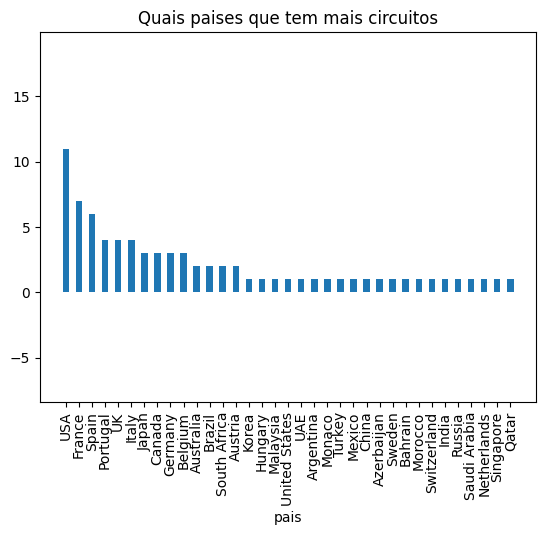

In [38]:
#Distribuição de classificações
count_ratings = circuitos['pais'].value_counts()

# Visualização em um gráfico de pizza
count_ratings.plot(kind='bar')
plt.axis('equal')
plt.title('Quais paises que tem mais circuitos')
plt.show()